# TP3 - VpC1
### Andrés Merli

Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en
Material_TPs/TP3/images a partir del template Material_TPs/TP3/template
1. (4 puntos) Obtener una detección del logo en cada imagen sin falsos positivos
2. (4 puntos) Plantear y validar un algoritmo para múltiples detecciones en la imagen
coca_multi.png con el mismo témplate del item1
3. (2 puntos) Generalizar el algoritmo del item 2 para todas las imágenes.
Visualizar los resultados con bounding boxes en cada imagen mostrando el nivel de confianza
de la detección.

In [9]:
#%matplotlib inline  

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

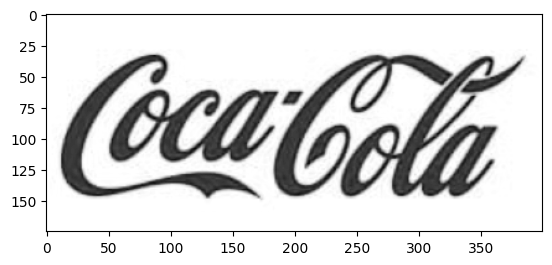

In [10]:
# Levantamos el Template
template = cv.imread('template/pattern.png', cv.IMREAD_GRAYSCALE)
plt.imshow(template, cmap='gray')

In [11]:
lista_nombres = ['coca_logo_1.png', 'coca_logo_2.png', 'coca_multi.png', 'coca_retro_1.png', 'coca_retro_2.png', 'COCA-COLA-LOGO.jpg', 'logo_1.png']

In [12]:
lista_imagenes = []
for name in lista_nombres:
    img = cv.imread('images/'+name)
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    lista_imagenes.append(img_rgb)

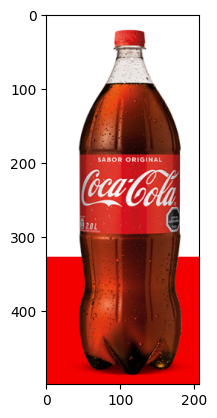

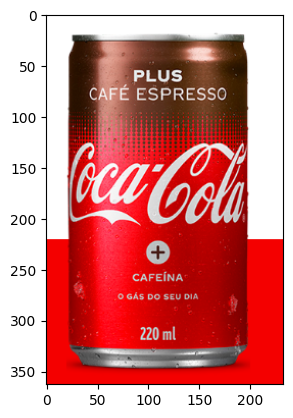

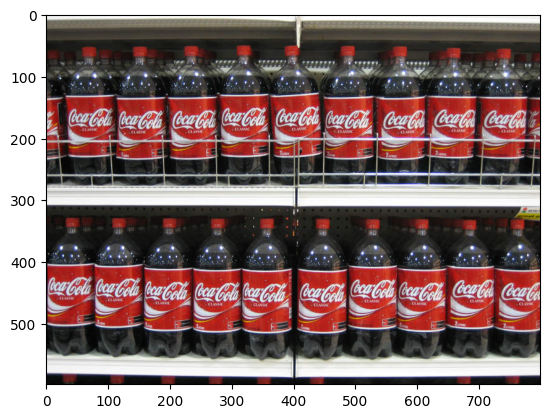

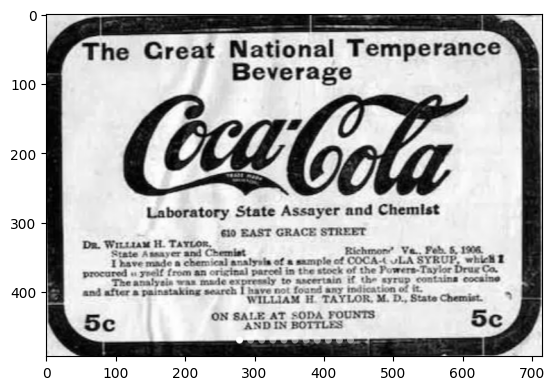

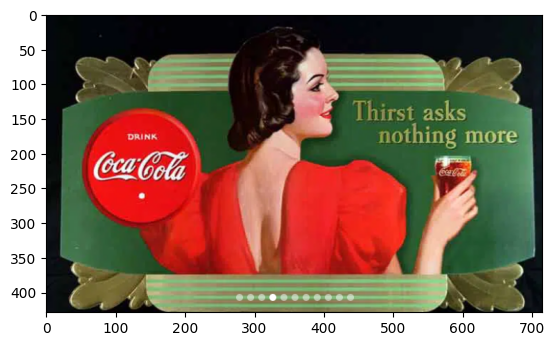

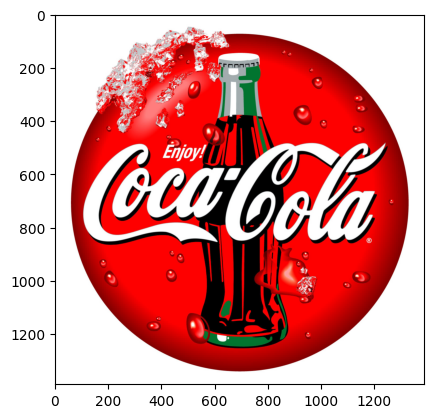

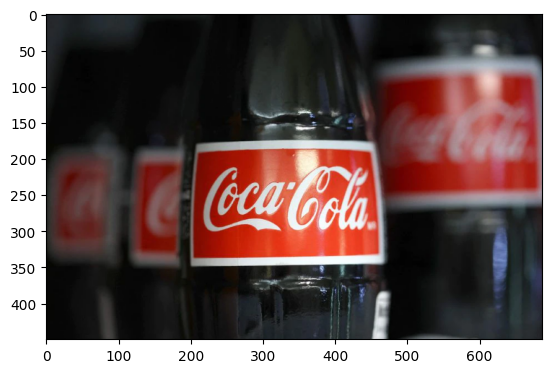

In [13]:
for img in lista_imagenes:
    plt.imshow(img)
    plt.show()

In [15]:
# Paso todas las imagenes a escala de grises
lista_imagenes_gray = []
for img in lista_imagenes:
    img_gray= cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    lista_imagenes_gray.append(img_gray)
    

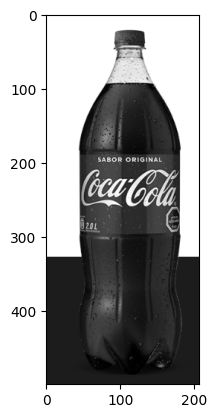

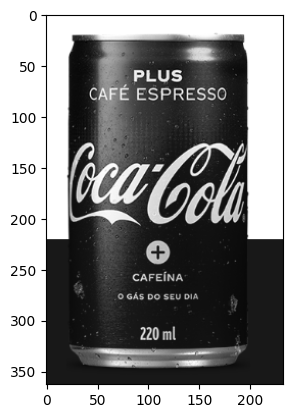

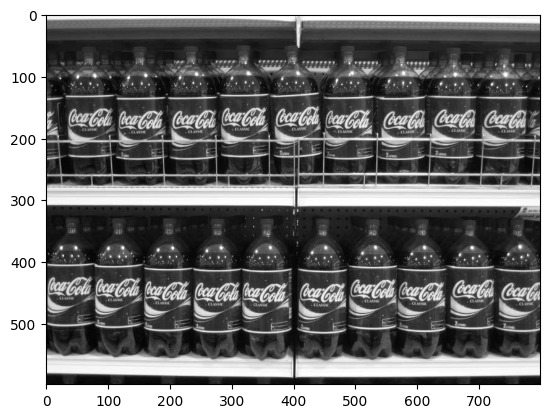

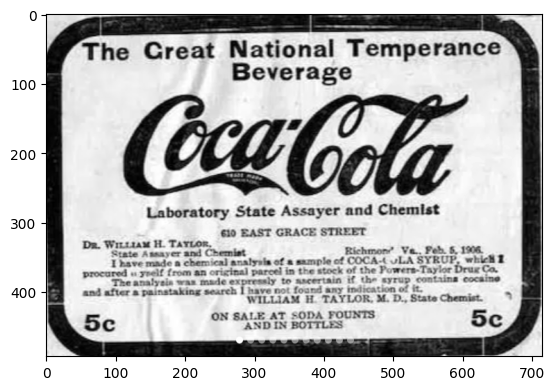

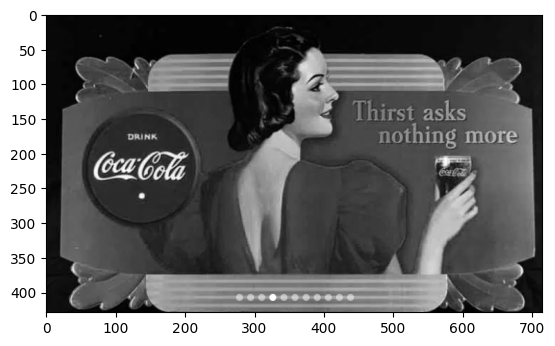

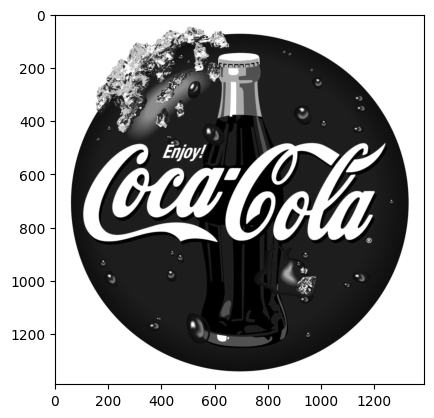

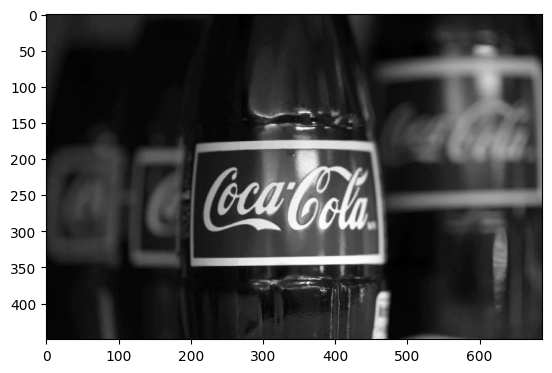

In [70]:
for img in lista_imagenes_gray:
    plt.imshow(img, cmap='gray')
    plt.show()

#### En algunas imagenes vamos a tener que modificamos el template antes de aplicar template matching para que las letras del logo nos queden en blanco

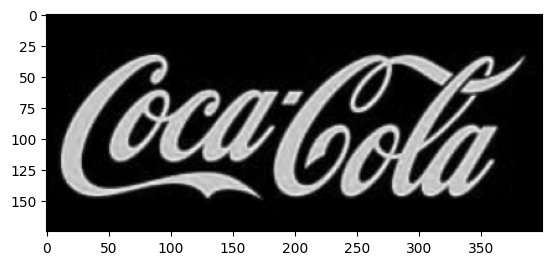

In [84]:
plt.imshow(cv.bitwise_not(template)+75, cmap='gray')

#### Detección de 1 logo por cada imagen

#### Para cada detección tenemos que ajustar el tamaño del template para adecuarlo a cada imagen, también vamos a evaluar distintos métodos

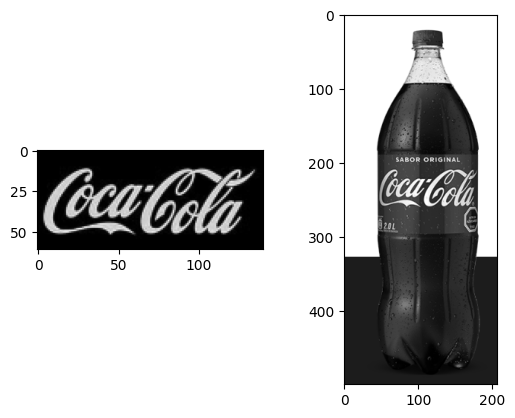

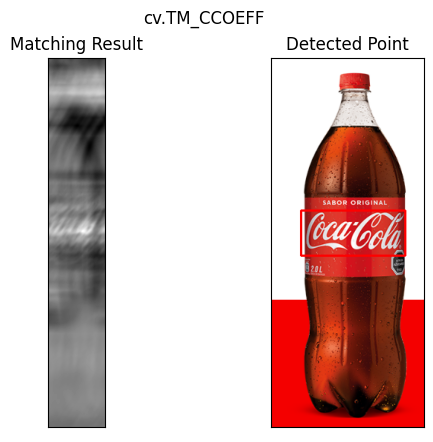

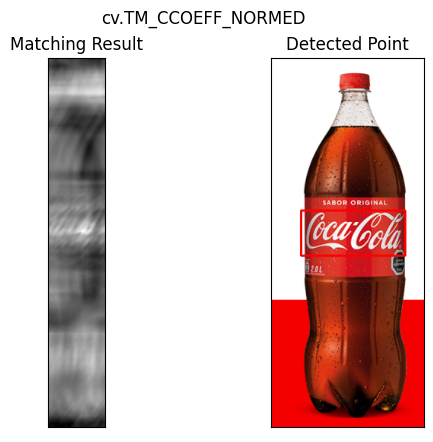

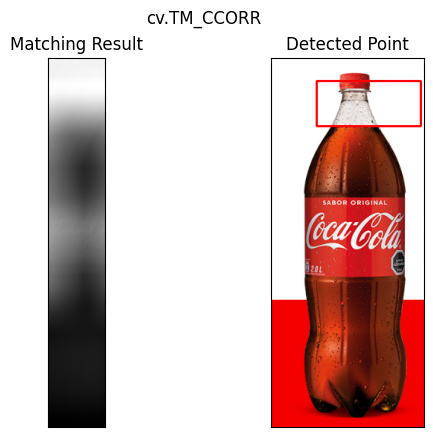

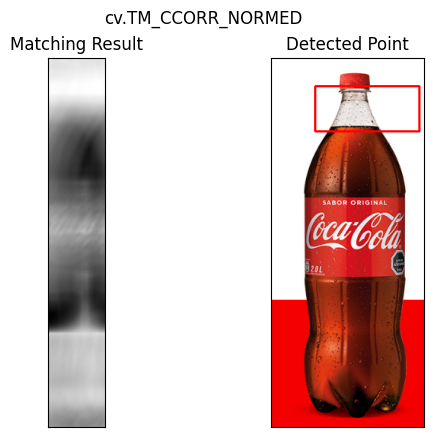

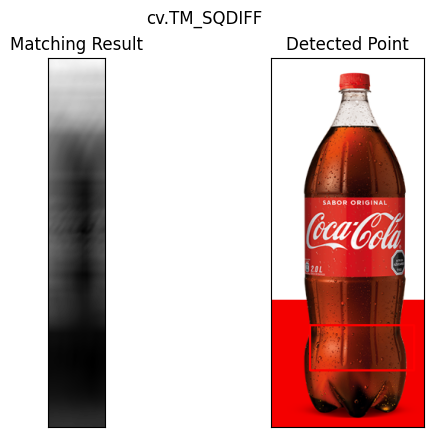

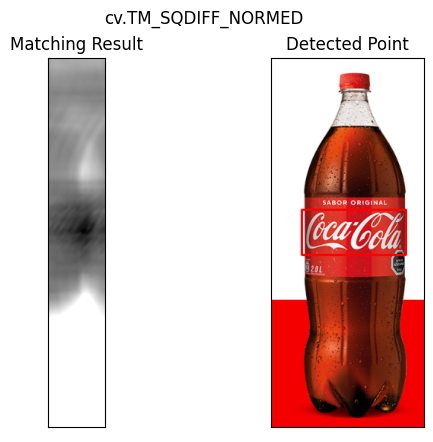

In [117]:
#w, h = template.shape[::-1]
# Los 6 métodos posibles para comparación:
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

num_imagen = 0

img_rgb = lista_imagenes[num_imagen]
img_gray = lista_imagenes_gray[num_imagen]

resized_template = cv.resize(template, None, fx=0.35, fy=0.35)
temp = cv.bitwise_not(resized_template)+75
w, h = resized_template.shape[::-1]

plt.figure()
plt.subplot(1,2,1)
plt.imshow(temp, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img_gray, cmap='gray')

for meth in methods:
        # Hago una copia de la imagen porque ciclo a ciclo le dibujo rectángulos
        img_salida = img_rgb.copy()
        method = eval(meth)
        
        res = cv.matchTemplate(img_gray, temp, method)
        
        # Encontramos los valores máximos y mínimos
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
        
        # Si el método es TM_SQDIFF o TM_SQDIFF_NORMED, tomamos el mínimo
        if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        
        # Marcamos el lugar donde lo haya encontrado
        #----------------------------------------
        bottom_right = (top_left[0] + w, top_left[1] + h)
        cv.rectangle(img_salida,top_left, bottom_right, 255, 2)
        
        plt.figure()
        
        # Resultado de coincidencia
        plt.subplot(121),plt.imshow(res,cmap = 'gray')
        plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
        
        # Imagen original con recuadros
        plt.subplot(122),plt.imshow(img_salida)
        plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
        
        plt.suptitle(meth)
        plt.show()

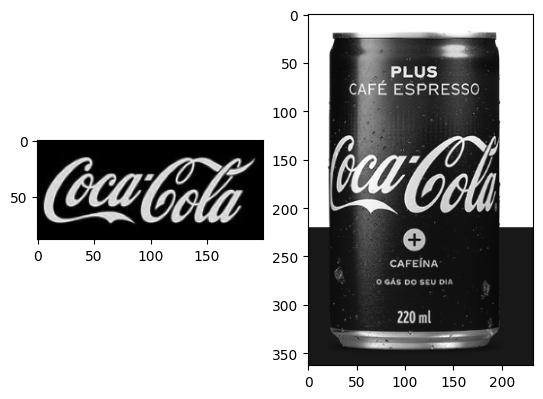

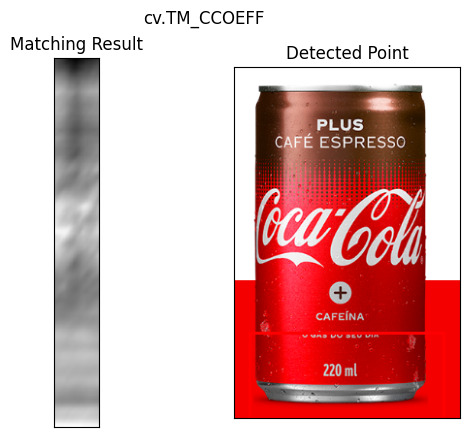

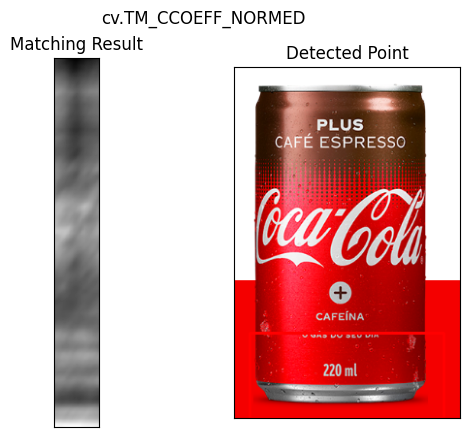

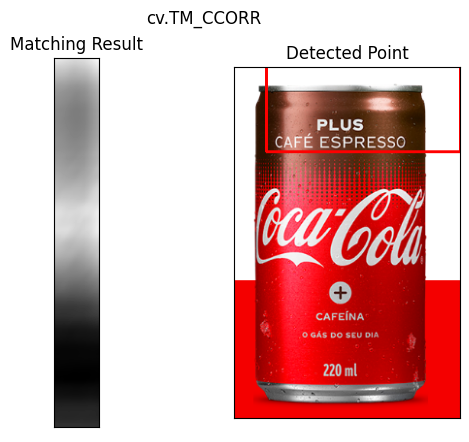

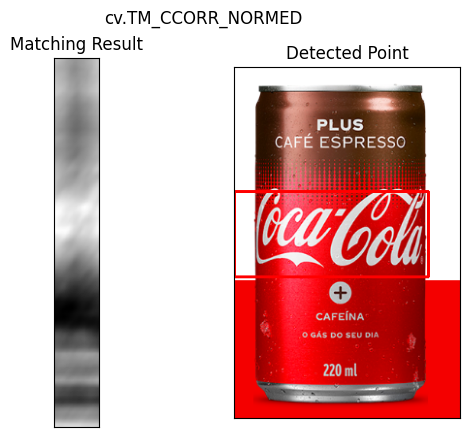

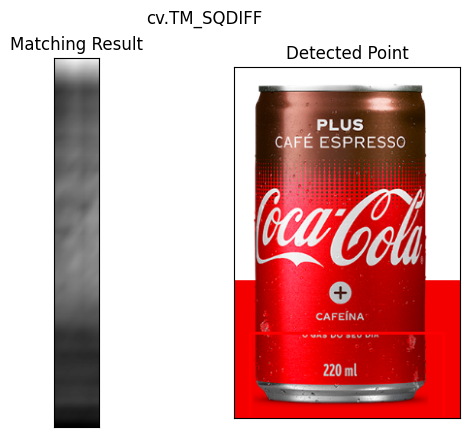

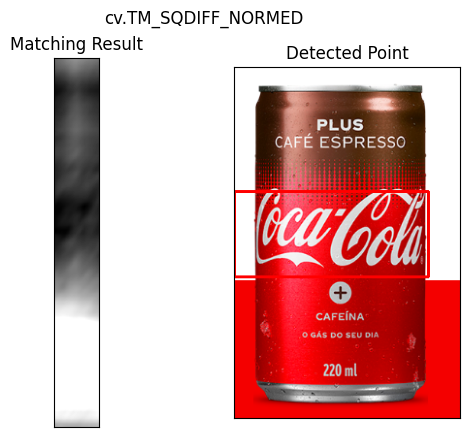

In [101]:
#w, h = template.shape[::-1]
# Los 6 métodos posibles para comparación:
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

num_imagen = 1

img_rgb = lista_imagenes[num_imagen]
img_gray = lista_imagenes_gray[num_imagen]

resized_template = cv.resize(template, None, fx=0.5, fy=0.5)
temp = cv.bitwise_not(resized_template)+75
w, h = resized_template.shape[::-1]

plt.figure()
plt.subplot(1,2,1)
plt.imshow(temp, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img_gray, cmap='gray')

for meth in methods:
        # Hago una copia de la imagen porque ciclo a ciclo le dibujo rectángulos
        img_salida = img_rgb.copy()
        method = eval(meth)
        
        # Aplicamos la coincidencia de patrones
        #--------------------------------------
        
        res = cv.matchTemplate(img_gray, temp, method)
        
        # Encontramos los valores máximos y mínimos
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
        
        # Si el método es TM_SQDIFF o TM_SQDIFF_NORMED, tomamos el mínimo
        if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        
        # Marcamos el lugar donde lo haya encontrado
        #----------------------------------------
        bottom_right = (top_left[0] + w, top_left[1] + h)
        cv.rectangle(img_salida,top_left, bottom_right, 255, 2)
        
        # Graficamos el procesamiento y la salida
        #----------------------------------------
        plt.figure()
        
        # Resultado de coincidencia
        plt.subplot(121),plt.imshow(res,cmap = 'gray')
        plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
        
        # Imagen original con recuadros
        plt.subplot(122),plt.imshow(img_salida)
        plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
        
        plt.suptitle(meth)
        plt.show()

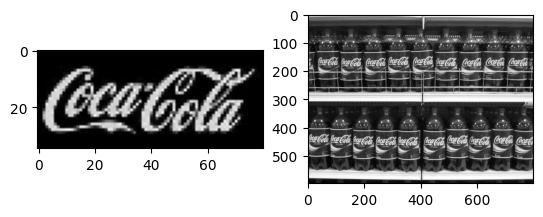

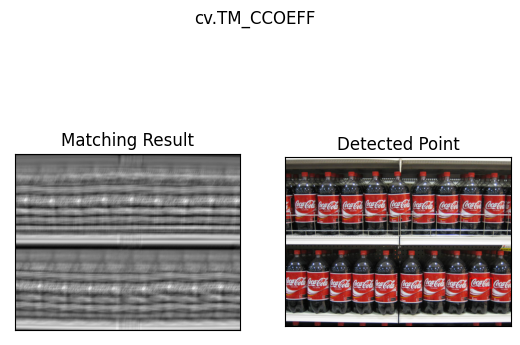

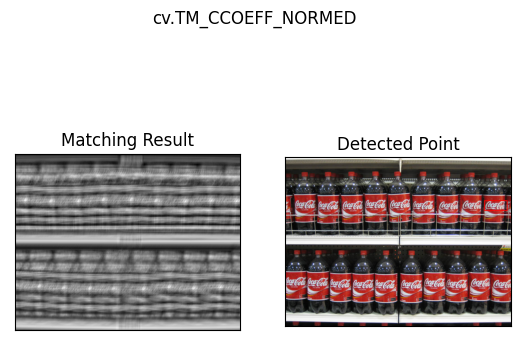

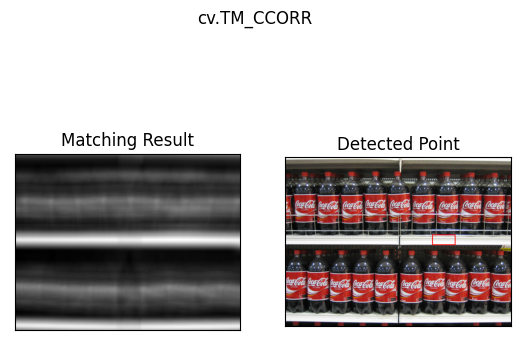

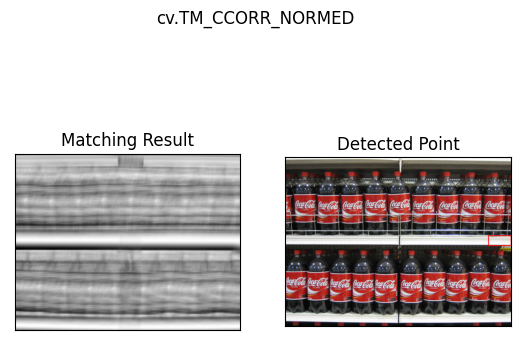

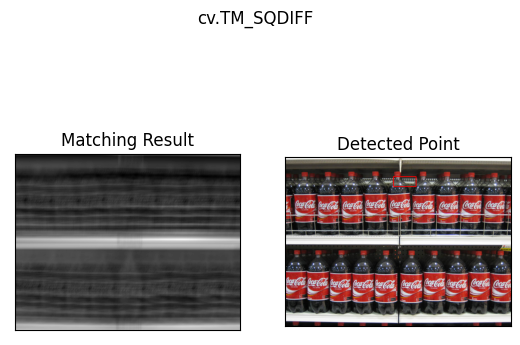

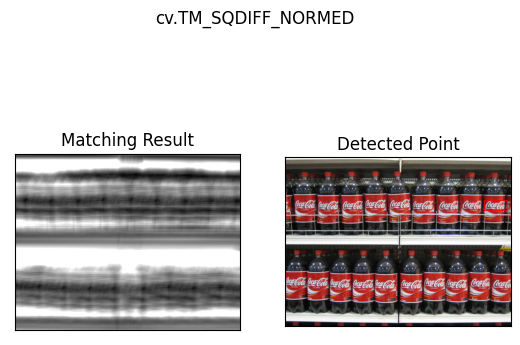

In [103]:
#w, h = template.shape[::-1]
# Los 6 métodos posibles para comparación:
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

num_imagen = 2

img_rgb = lista_imagenes[num_imagen]
img_gray = lista_imagenes_gray[num_imagen]

resized_template = cv.resize(template, None, fx=0.2, fy=0.2)
temp = cv.bitwise_not(resized_template)+75
w, h = resized_template.shape[::-1]

plt.figure()
plt.subplot(1,2,1)
plt.imshow(temp, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img_gray, cmap='gray')

for meth in methods:
        # Hago una copia de la imagen porque ciclo a ciclo le dibujo rectángulos
        img_salida = img_rgb.copy()
        method = eval(meth)
        
        # Aplicamos la coincidencia de patrones
        #--------------------------------------
        
        res = cv.matchTemplate(img_gray, temp, method)
        
        # Encontramos los valores máximos y mínimos
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
        
        # Si el método es TM_SQDIFF o TM_SQDIFF_NORMED, tomamos el mínimo
        if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        
        # Marcamos el lugar donde lo haya encontrado
        #----------------------------------------
        bottom_right = (top_left[0] + w, top_left[1] + h)
        cv.rectangle(img_salida,top_left, bottom_right, 255, 2)
        
        # Graficamos el procesamiento y la salida
        #----------------------------------------
        plt.figure()
        
        # Resultado de coincidencia
        plt.subplot(121),plt.imshow(res,cmap = 'gray')
        plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
        
        # Imagen original con recuadros
        plt.subplot(122),plt.imshow(img_salida)
        plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
        
        plt.suptitle(meth)
        plt.show()

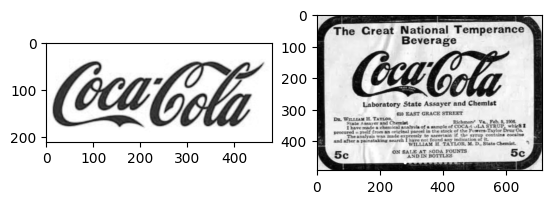

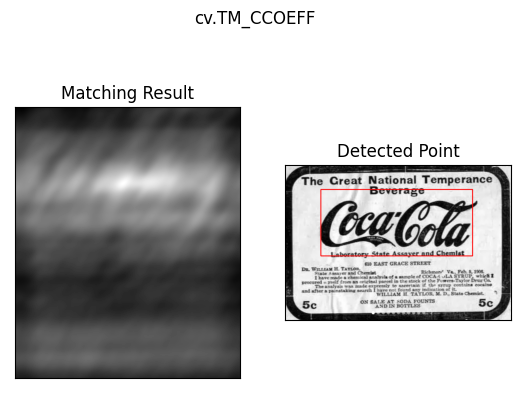

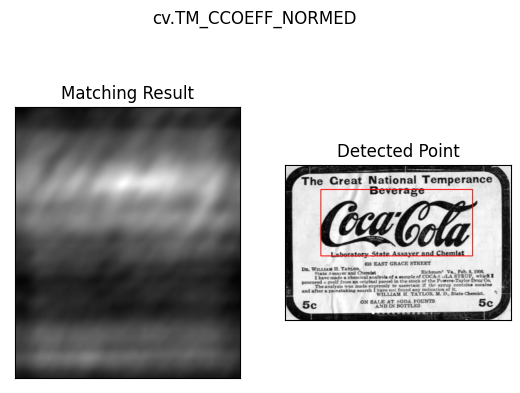

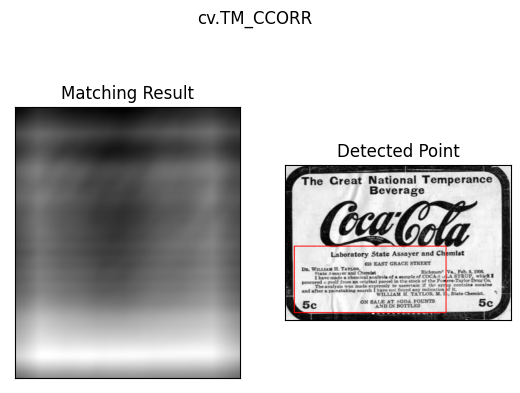

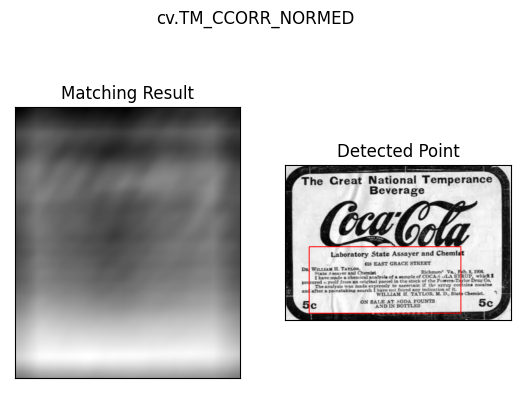

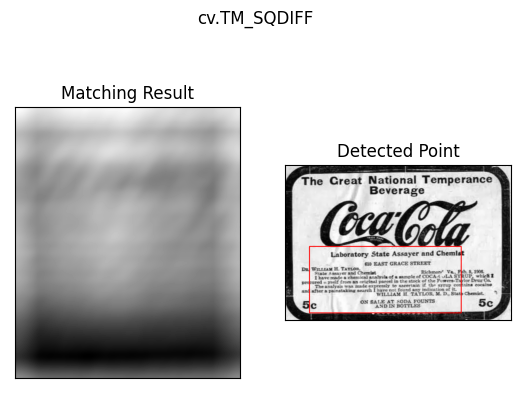

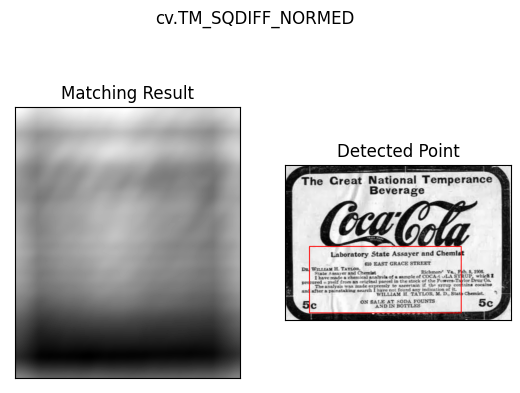

In [107]:
#w, h = template.shape[::-1]
# Los 6 métodos posibles para comparación:
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

num_imagen = 3

img_rgb = lista_imagenes[num_imagen]
img_gray = lista_imagenes_gray[num_imagen]

resized_template = cv.resize(template, None, fx=1.2, fy=1.2)
temp = resized_template
w, h = resized_template.shape[::-1]

plt.figure()
plt.subplot(1,2,1)
plt.imshow(temp, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img_gray, cmap='gray')

for meth in methods:
        # Hago una copia de la imagen porque ciclo a ciclo le dibujo rectángulos
        img_salida = img_rgb.copy()
        method = eval(meth)
        
        # Aplicamos la coincidencia de patrones
        #--------------------------------------
        
        res = cv.matchTemplate(img_gray, temp, method)
        
        # Encontramos los valores máximos y mínimos
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
        
        # Si el método es TM_SQDIFF o TM_SQDIFF_NORMED, tomamos el mínimo
        if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        
        # Marcamos el lugar donde lo haya encontrado
        #----------------------------------------
        bottom_right = (top_left[0] + w, top_left[1] + h)
        cv.rectangle(img_salida,top_left, bottom_right, 255, 2)
        
        # Graficamos el procesamiento y la salida
        #----------------------------------------
        plt.figure()
        
        # Resultado de coincidencia
        plt.subplot(121),plt.imshow(res,cmap = 'gray')
        plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
        
        # Imagen original con recuadros
        plt.subplot(122),plt.imshow(img_salida)
        plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
        
        plt.suptitle(meth)
        plt.show()

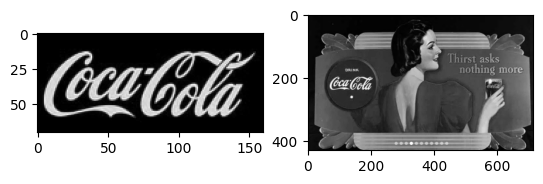

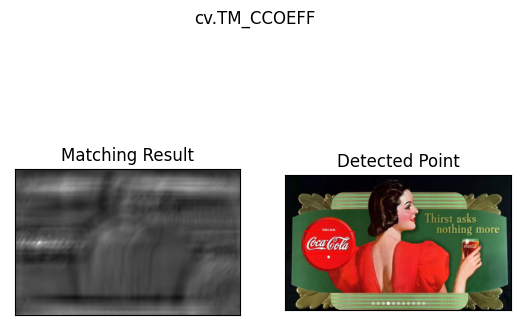

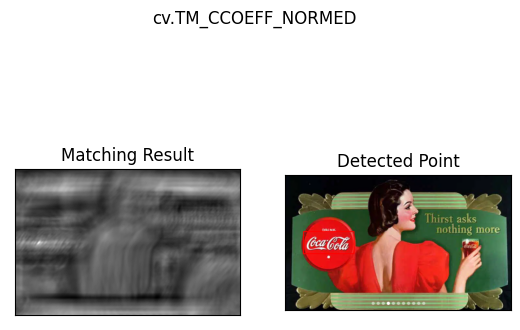

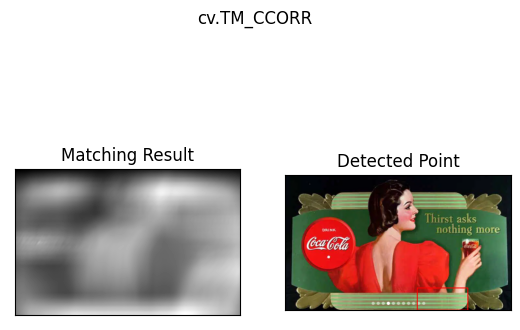

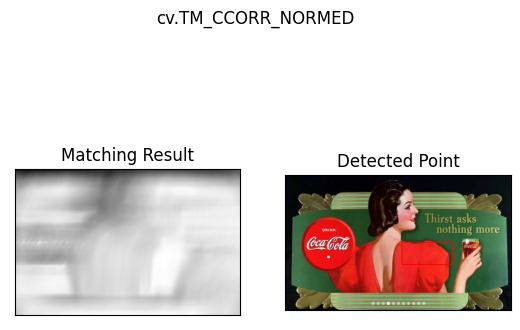

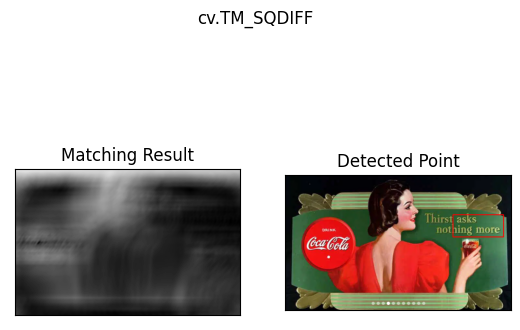

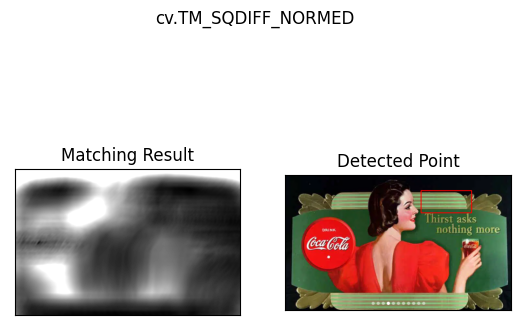

In [109]:
#w, h = template.shape[::-1]
# Los 6 métodos posibles para comparación:
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

num_imagen = 4

img_rgb = lista_imagenes[num_imagen]
img_gray = lista_imagenes_gray[num_imagen]

resized_template = cv.resize(template, None, fx=0.4, fy=0.4)
temp = cv.bitwise_not(resized_template)+75
w, h = resized_template.shape[::-1]

plt.figure()
plt.subplot(1,2,1)
plt.imshow(temp, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img_gray, cmap='gray')

for meth in methods:
        # Hago una copia de la imagen porque ciclo a ciclo le dibujo rectángulos
        img_salida = img_rgb.copy()
        method = eval(meth)
        
        # Aplicamos la coincidencia de patrones
        #--------------------------------------
        
        res = cv.matchTemplate(img_gray, temp, method)
        
        # Encontramos los valores máximos y mínimos
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
        
        # Si el método es TM_SQDIFF o TM_SQDIFF_NORMED, tomamos el mínimo
        if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        
        # Marcamos el lugar donde lo haya encontrado
        #----------------------------------------
        bottom_right = (top_left[0] + w, top_left[1] + h)
        cv.rectangle(img_salida,top_left, bottom_right, 255, 2)
        
        # Graficamos el procesamiento y la salida
        #----------------------------------------
        plt.figure()
        
        # Resultado de coincidencia
        plt.subplot(121),plt.imshow(res,cmap = 'gray')
        plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
        
        # Imagen original con recuadros
        plt.subplot(122),plt.imshow(img_salida)
        plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
        
        plt.suptitle(meth)
        plt.show()

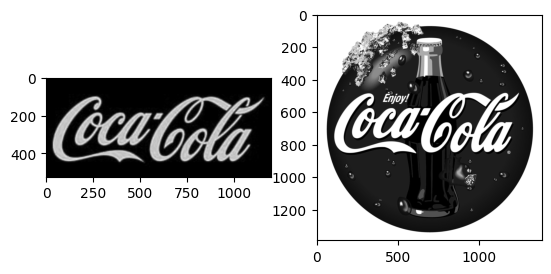

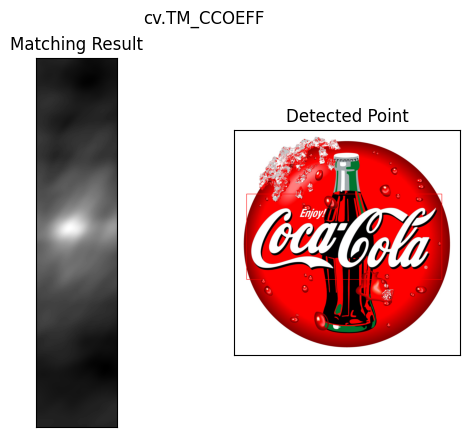

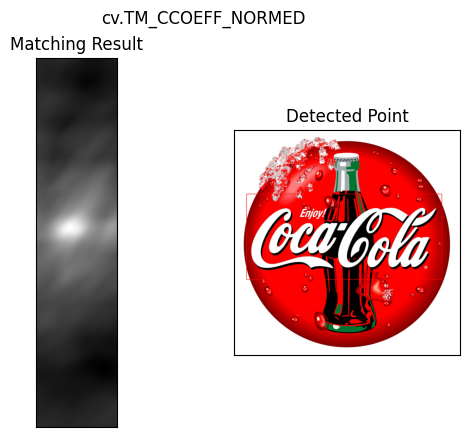

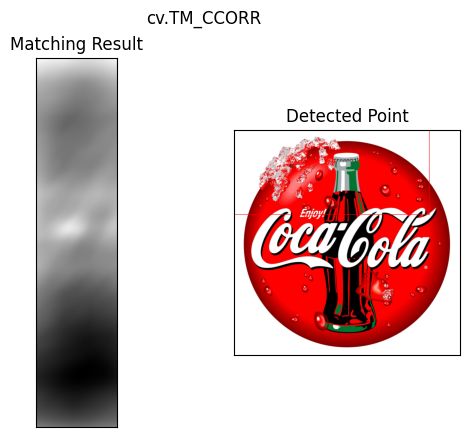

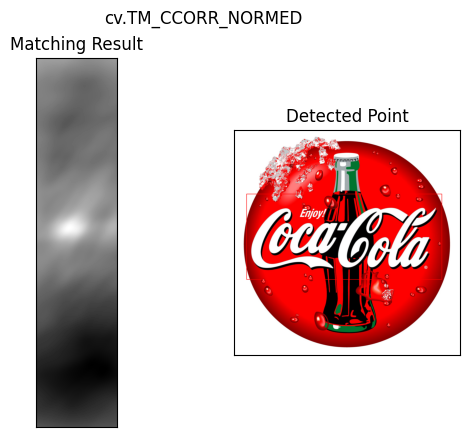

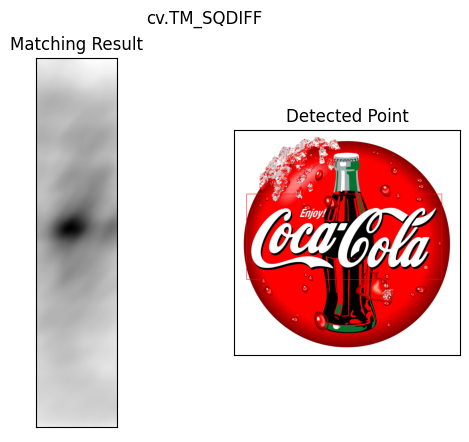

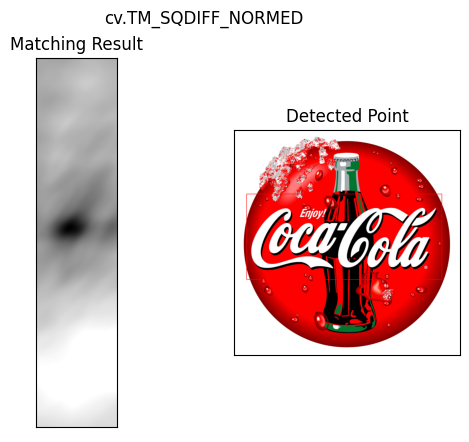

In [114]:
#w, h = template.shape[::-1]
# Los 6 métodos posibles para comparación:
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

num_imagen = 5

img_rgb = lista_imagenes[num_imagen]
img_gray = lista_imagenes_gray[num_imagen]

resized_template = cv.resize(template, None, fx=3, fy=3)
temp = cv.bitwise_not(resized_template)+75
w, h = resized_template.shape[::-1]

plt.figure()
plt.subplot(1,2,1)
plt.imshow(temp, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img_gray, cmap='gray')

for meth in methods:
        # Hago una copia de la imagen porque ciclo a ciclo le dibujo rectángulos
        img_salida = img_rgb.copy()
        method = eval(meth)
        
        # Aplicamos la coincidencia de patrones
        #--------------------------------------
        
        res = cv.matchTemplate(img_gray, temp, method)
        
        # Encontramos los valores máximos y mínimos
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
        
        # Si el método es TM_SQDIFF o TM_SQDIFF_NORMED, tomamos el mínimo
        if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        
        # Marcamos el lugar donde lo haya encontrado
        #----------------------------------------
        bottom_right = (top_left[0] + w, top_left[1] + h)
        cv.rectangle(img_salida,top_left, bottom_right, 255, 2)
        
        # Graficamos el procesamiento y la salida
        #----------------------------------------
        plt.figure()
        
        # Resultado de coincidencia
        plt.subplot(121),plt.imshow(res,cmap = 'gray')
        plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
        
        # Imagen original con recuadros
        plt.subplot(122),plt.imshow(img_salida)
        plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
        
        plt.suptitle(meth)
        plt.show()

In [ ]:
#w, h = template.shape[::-1]
# Los 6 métodos posibles para comparación:
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

num_imagen = 1

img_rgb = lista_imagenes[num_imagen]
img_gray = lista_imagenes_gray[num_imagen]

resized_template = cv.resize(template, None, fx=0.5, fy=0.5)
temp = cv.bitwise_not(resized_template)+75
w, h = resized_template.shape[::-1]

plt.figure()
plt.subplot(1,2,1)
plt.imshow(temp, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img_gray, cmap='gray')

for meth in methods:
        # Hago una copia de la imagen porque ciclo a ciclo le dibujo rectángulos
        img_salida = img_rgb.copy()
        method = eval(meth)
        
        # Aplicamos la coincidencia de patrones
        #--------------------------------------
        
        res = cv.matchTemplate(img_gray, temp, method)
        
        # Encontramos los valores máximos y mínimos
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
        
        # Si el método es TM_SQDIFF o TM_SQDIFF_NORMED, tomamos el mínimo
        if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        
        # Marcamos el lugar donde lo haya encontrado
        #----------------------------------------
        bottom_right = (top_left[0] + w, top_left[1] + h)
        cv.rectangle(img_salida,top_left, bottom_right, 255, 2)
        
        # Graficamos el procesamiento y la salida
        #----------------------------------------
        plt.figure()
        
        # Resultado de coincidencia
        plt.subplot(121),plt.imshow(res,cmap = 'gray')
        plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
        
        # Imagen original con recuadros
        plt.subplot(122),plt.imshow(img_salida)
        plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
        
        plt.suptitle(meth)
        plt.show()

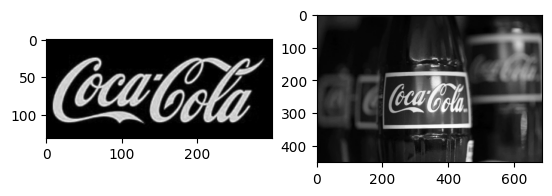

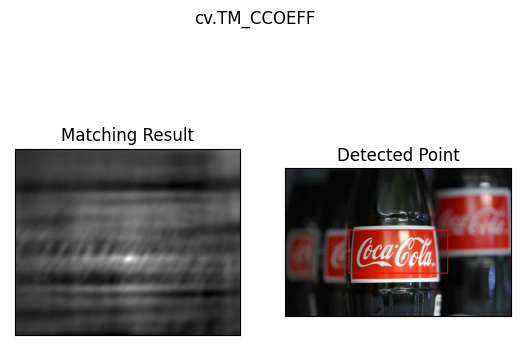

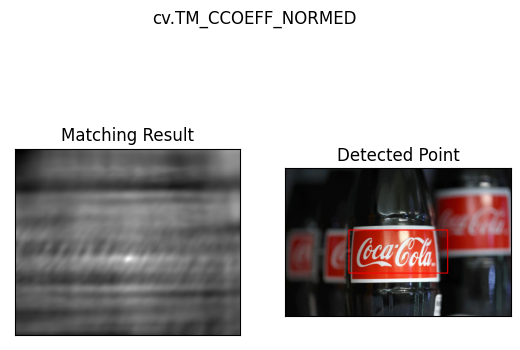

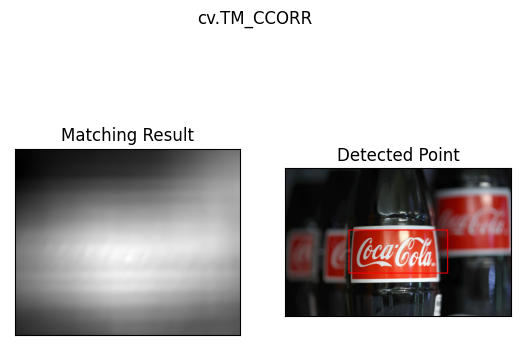

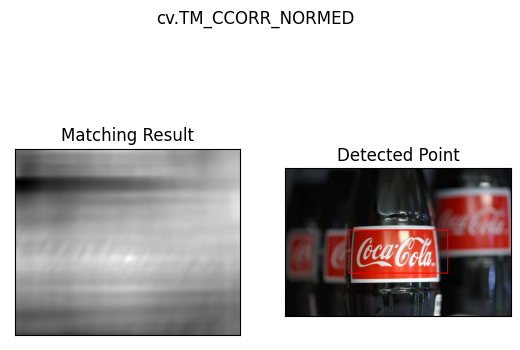

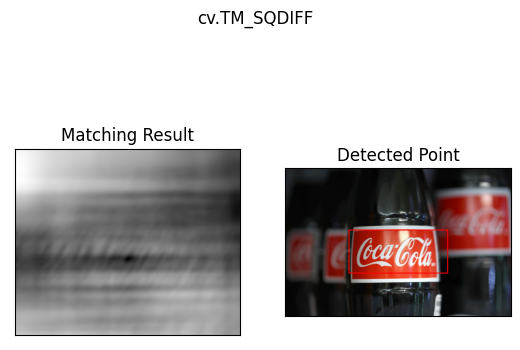

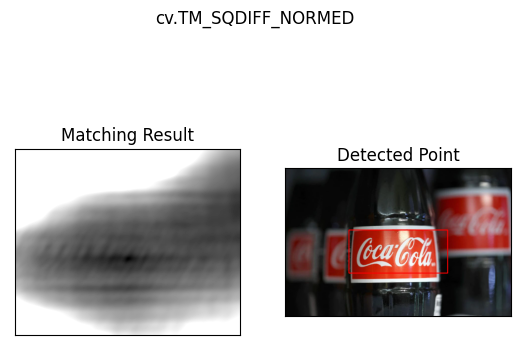

In [116]:
#w, h = template.shape[::-1]
# Los 6 métodos posibles para comparación:
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

num_imagen = 6

img_rgb = lista_imagenes[num_imagen]
img_gray = lista_imagenes_gray[num_imagen]

resized_template = cv.resize(template, None, fx=0.75, fy=0.75)
temp = cv.bitwise_not(resized_template)+75
w, h = resized_template.shape[::-1]

plt.figure()
plt.subplot(1,2,1)
plt.imshow(temp, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img_gray, cmap='gray')

for meth in methods:
        # Hago una copia de la imagen porque ciclo a ciclo le dibujo rectángulos
        img_salida = img_rgb.copy()
        method = eval(meth)
        
        # Aplicamos la coincidencia de patrones
        #--------------------------------------
        
        res = cv.matchTemplate(img_gray, temp, method)
        
        # Encontramos los valores máximos y mínimos
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
        
        # Si el método es TM_SQDIFF o TM_SQDIFF_NORMED, tomamos el mínimo
        if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        
        # Marcamos el lugar donde lo haya encontrado
        #----------------------------------------
        bottom_right = (top_left[0] + w, top_left[1] + h)
        cv.rectangle(img_salida,top_left, bottom_right, 255, 2)
        
        # Graficamos el procesamiento y la salida
        #----------------------------------------
        plt.figure()
        
        # Resultado de coincidencia
        plt.subplot(121),plt.imshow(res,cmap = 'gray')
        plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
        
        # Imagen original con recuadros
        plt.subplot(122),plt.imshow(img_salida)
        plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
        
        plt.suptitle(meth)
        plt.show()

### Vamos a intentar detecciones múltiples sobre la imagen coca_multi.png

In [ ]:
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

num_imagen = 2

img_rgb = lista_imagenes[num_imagen]
img_gray = lista_imagenes_gray[num_imagen]

resized_template = cv.resize(template, None, fx=0.2, fy=0.2)
temp = cv.bitwise_not(resized_template)+75
w, h = resized_template.shape[::-1]

plt.figure()
plt.subplot(1,2,1)
plt.imshow(temp, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img_gray, cmap='gray')

In [ ]:
img_rgb = cv.imread('batman_lego.jpg')
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
template = cv.imread('patron.png',0)

w, h = template.shape[::-1]
res = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED)
# Fijamos un umbral de "coincidencia"
threshold = 0.75


loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

cv.imshow("batmans",img_rgb)    
#cv.imwrite('res.png',img_rgb)
cv.waitKey()